To show this demo, first run

code/ColorMNIST/00_make_data.py

to create the biased MNIST dataset

In [1]:

import sys
import numpy as np

import pickle as pkl
import torch
from os.path import join as oj
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from os.path import join as oj
import torch.utils.data as utils
import sys, time
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.precision', 3)

In [2]:
save_path = "../results_for_export"
x_train = np.load(oj("../data/ColorMNIST", "train_x.npy"))/255.0
y_train = np.load(oj("../data/ColorMNIST", "train_y.npy"))
x_test = np.load(oj("../data/ColorMNIST", "test_x.npy"))/255.0
y_test = np.load(oj("../data/ColorMNIST", "test_y.npy"))

Text(0, 0.5, 'Test')

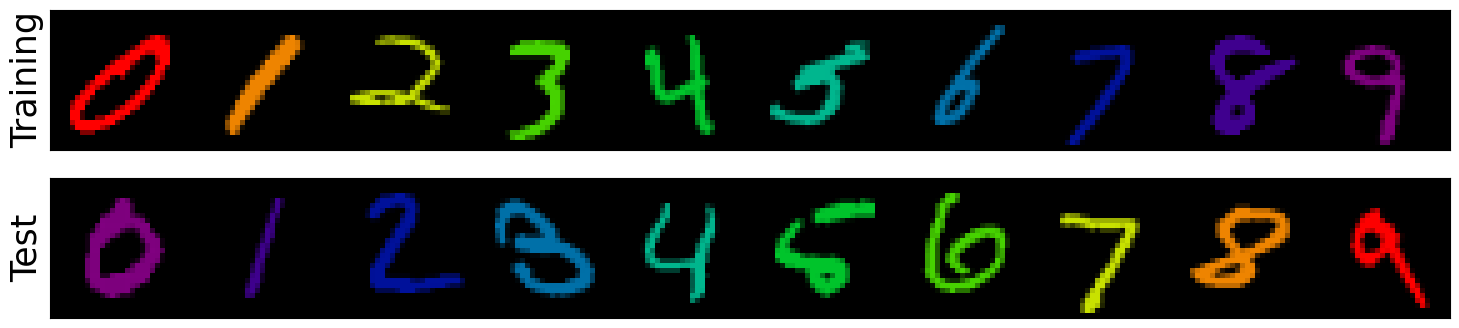

In [3]:
fig, axes = plt.subplots(nrows= 2, figsize = (20, 4))
indices = []
for i in range(10):
    indices.append(np.where(y_train ==i)[0][0])
ex_imgs = np.hstack(x_train[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) 
axes[0].imshow(ex_imgs);
axes[0].set_ylabel("Training", fontsize = 25)
indices = []
for i in range(10):
    indices.append(np.where(y_test ==i)[0][0])
ex_imgs = np.hstack(x_test[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) 
axes[1].imshow(ex_imgs);
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_ylabel("Test", fontsize = 25)
# fig.savefig(oj(save_path, "ColorMNIST_examples"))


Now we train a neural network with and without CDEP on this data. To do this, run

code/ColorMNIST/02_make_demo.py 

with GPU enabled (The code was only tested on GPU and may not work on CPU).

This will train without any regularization and with CDEP lambda of 5000.

In [4]:
trained_model_folder = '../models/ColorMNIST_test' #the models are saved in this folder
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 
results['acc_dev'] = [max(x) for x in results.accs_dev]

In [5]:
results[['regularizer_rate','acc_dev','acc_test',]]

,regularizer_rate,acc_dev,acc_test
0,1000.0,11.783,10.78
1,0.0,0.483,0.51
2,5000.0,34.400,33.24
3,1000.0,36.033,34.71
4,0.0,0.733,0.97
...,...,...,...
335,0.0,0.000,0.03
336,0.0,0.000,0.00
337,0.0,0.000,0.01
338,0.0,0.050,0.07


Regularization with CDEP increases the accuracy on the (inversely biased with color) test set.